In [28]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import plotly
import plotly.express as px

In [29]:
df = pd.read_csv('D:\Программирование\Data Science\Обучение\Python_13_9\churn.csv')

In [30]:
df = df.drop(['RowNumber'], axis=1)

In [31]:
display(df)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Задание 9.1 

Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

In [32]:
df_loyal = df['Exited'].value_counts()

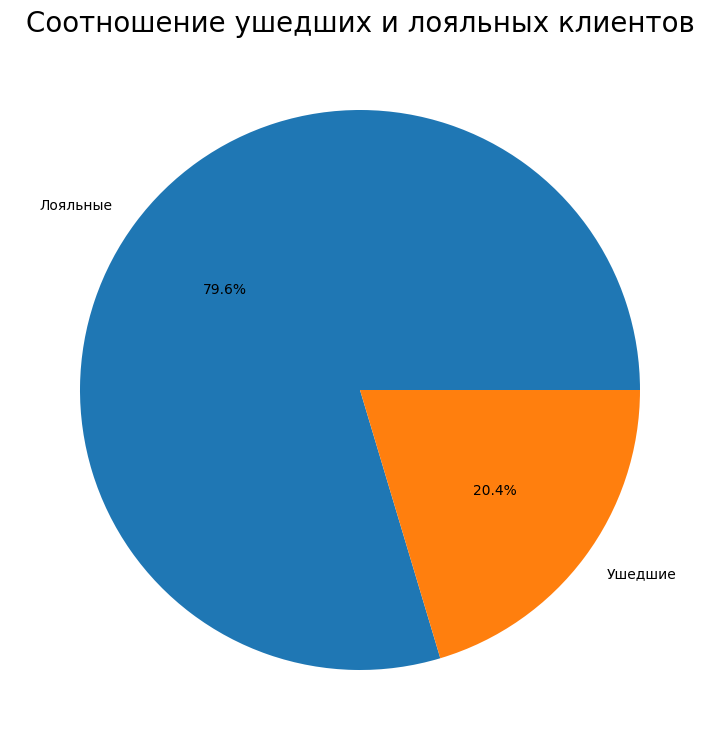

In [33]:
fig_loyal = plt.figure(figsize=(7, 7))
axes_loyal = fig_loyal.add_axes([0, 0, 1, 1])
axes_loyal.pie(df_loyal,
         labels=['Лояльные', 'Ушедшие'],
         autopct='%.1f%%');

axes_loyal.set_title('Соотношение ушедших и лояльных клиентов', fontsize=20);

График показал, что лояльных клиентов в 4 раза больше, чем ушедших

## Задание 9.2

Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [34]:
df_balance = df[df['Balance'] > 2500]

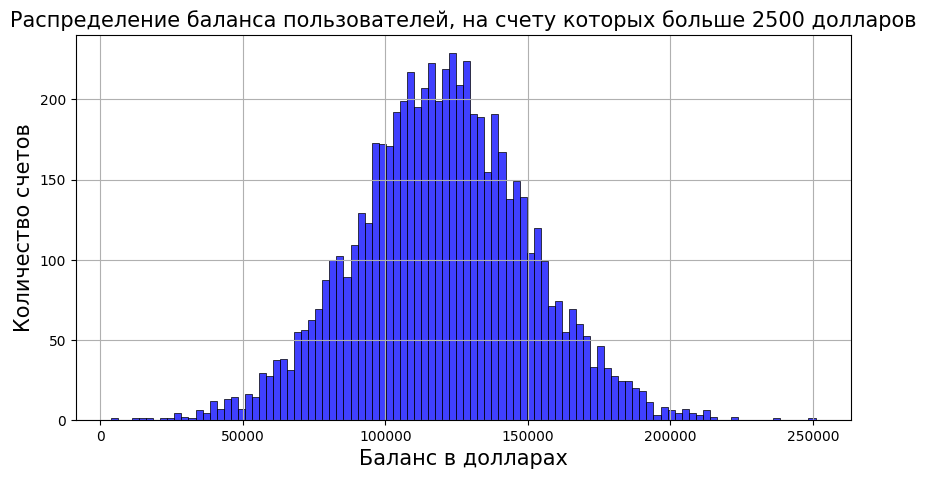

In [35]:
fig_balance = plt.figure(figsize=(10, 5))

hist_balance = sns.histplot(
    data=df_balance,
    x='Balance',
    bins=100,
    color='Blue');

hist_balance.set_title('Распределение баланса пользователей, на счету которых больше 2500 долларов', fontsize=15);
hist_balance.set_xlabel('Баланс в долларах', fontsize=15);
hist_balance.set_ylabel('Количество счетов', fontsize=15);
hist_balance.grid()

Распределение имеет нормальный вид, больше всего клиентов, на балансе которых от 100000 до 150000

## Задание 9.3

Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

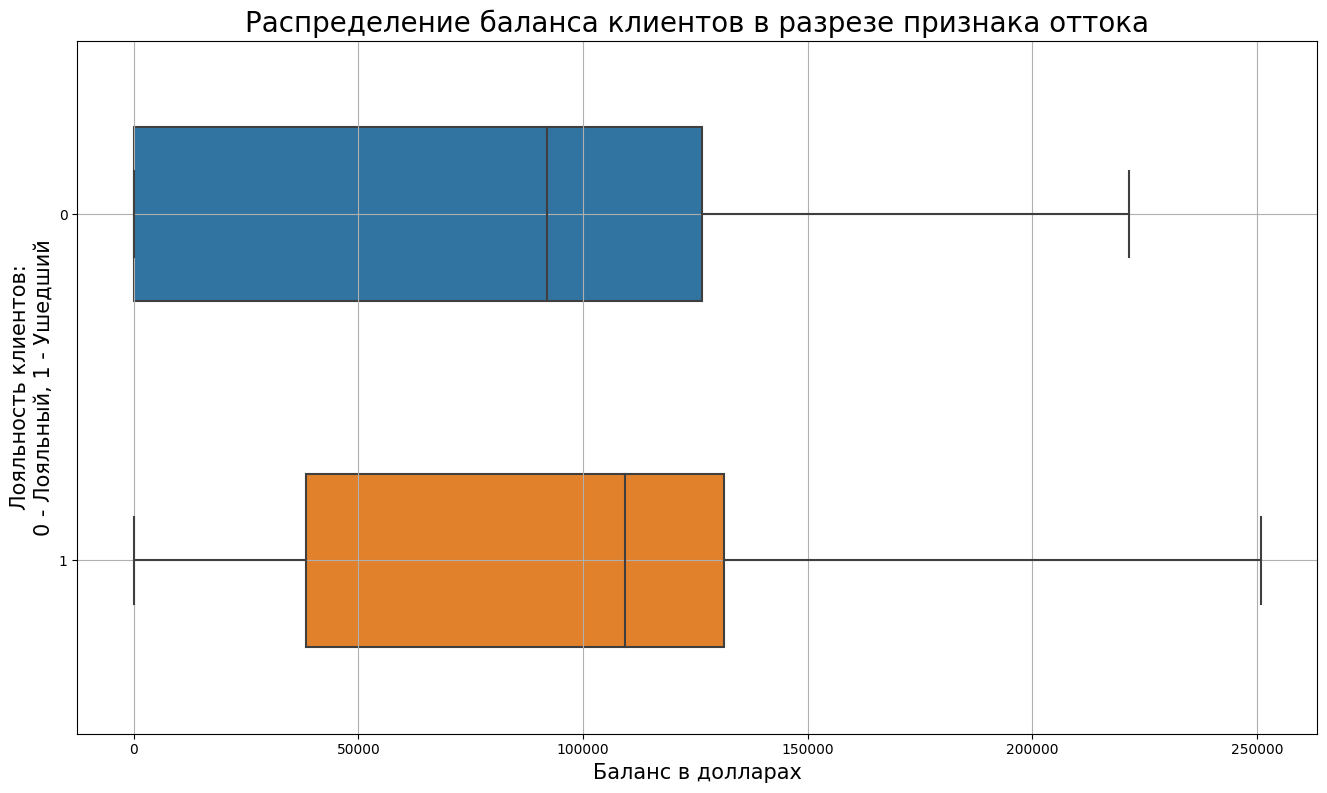

In [36]:
fig_box = plt.figure(figsize=(16, 9))


box_plot = sns.boxplot(
    data=df,
    y='Exited',
    x='Balance',
    orient='h',
    width=0.5
);

box_plot.set_title('Распределение баланса клиентов в разрезе признака оттока', fontsize=20);
box_plot.set_xlabel('Баланс в долларах', fontsize=15);
box_plot.set_ylabel('''Лояльность клиентов:
0 - Лояльный, 1 - Ушедший''', fontsize=15, loc='center');
box_plot.grid()

Средняя сумма на счету ушедших клиентов (около 110000 долларов) выше, чем средняя сумма на счету у лояльных клиентов (около 90000 долларов). Возможно ушедших клиентов не устраивали условия хранения денежных средств и они нашли более выгодные предложения в других банках или же достигли своей цели по накоплению на дорогую покупку.

## Задание 9.4

Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

In [37]:
df_out = df[df['Exited'] == 1]

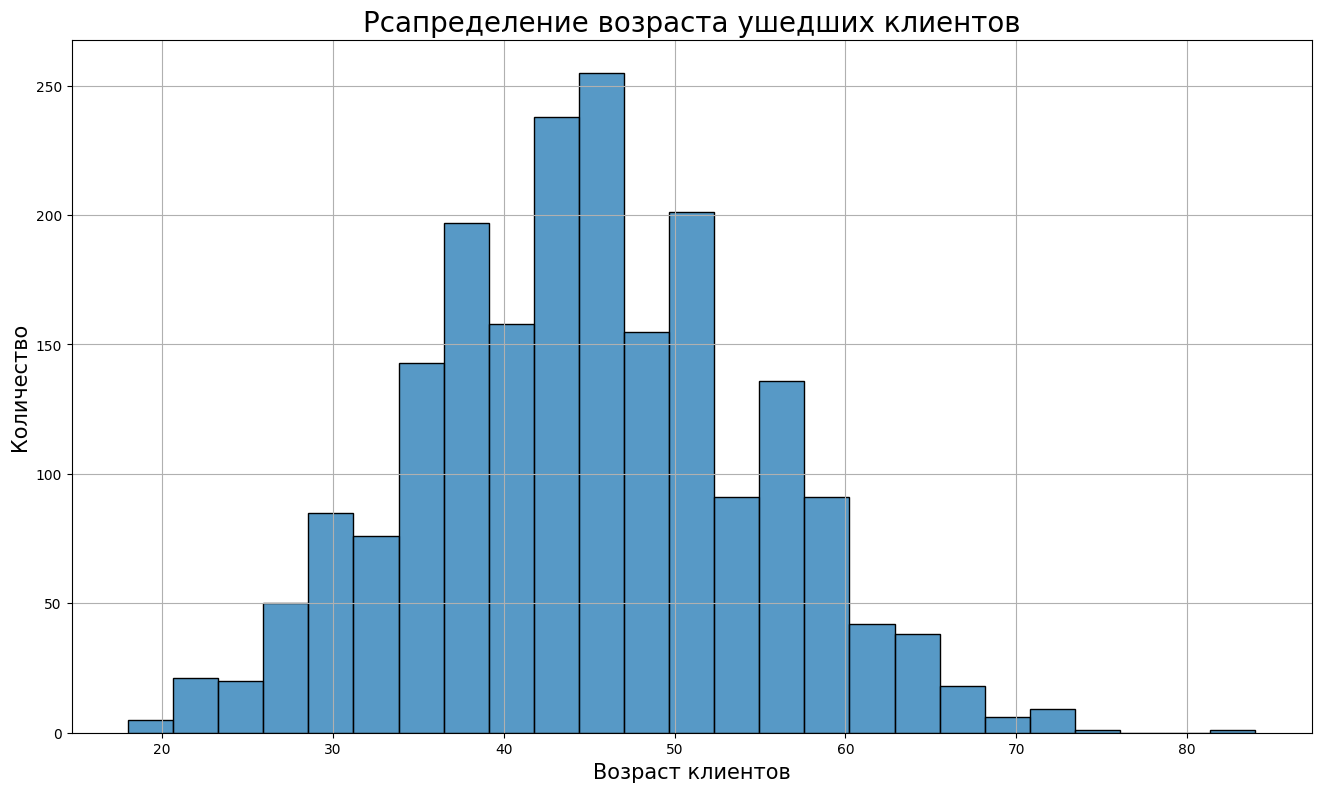

In [38]:
fig = plt.figure(figsize=(16, 9))

axes_out = sns.histplot(
    data=df_out,
    x='Age',
    bins=25
);

axes_out.set_title('Рсапределение возраста ушедших клиентов', fontsize=20);
axes_out.set_xlabel('Возраст клиентов', fontsize=15);
axes_out.set_ylabel('Количество', fontsize=15);
axes_out.grid()

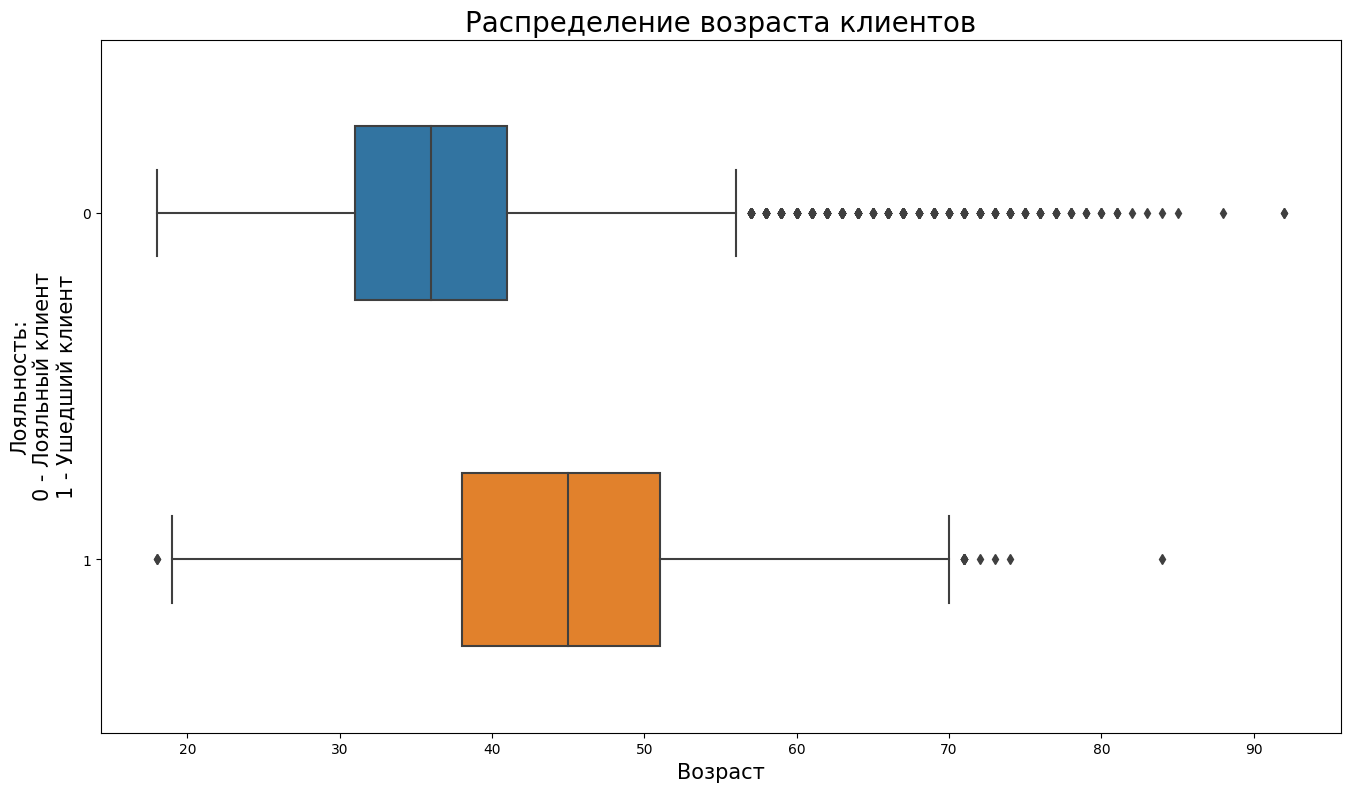

In [39]:
fig = plt.figure(figsize=(16, 9))

axes_box = sns.boxplot(
    data=df,
    x='Age',
    y='Exited',
    orient='h',
    width=0.5
);
axes_box.set_title('Распределение возраста клиентов', fontsize=20);
axes_box.set_xlabel('Возраст', fontsize=15);
axes_box.set_ylabel('''Лояльность:
0 - Лояльный клиент
1 - Ушедший клиент''', fontsize=15);

Потенциальных выбросов больше среди лояльных клиентов. Внимание следует обрать на группу в возрасте от 38 до 52 лет, так как в наибольшая часть ушедших клиентов входит в этот диапазон.

## Задание 9.5

Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

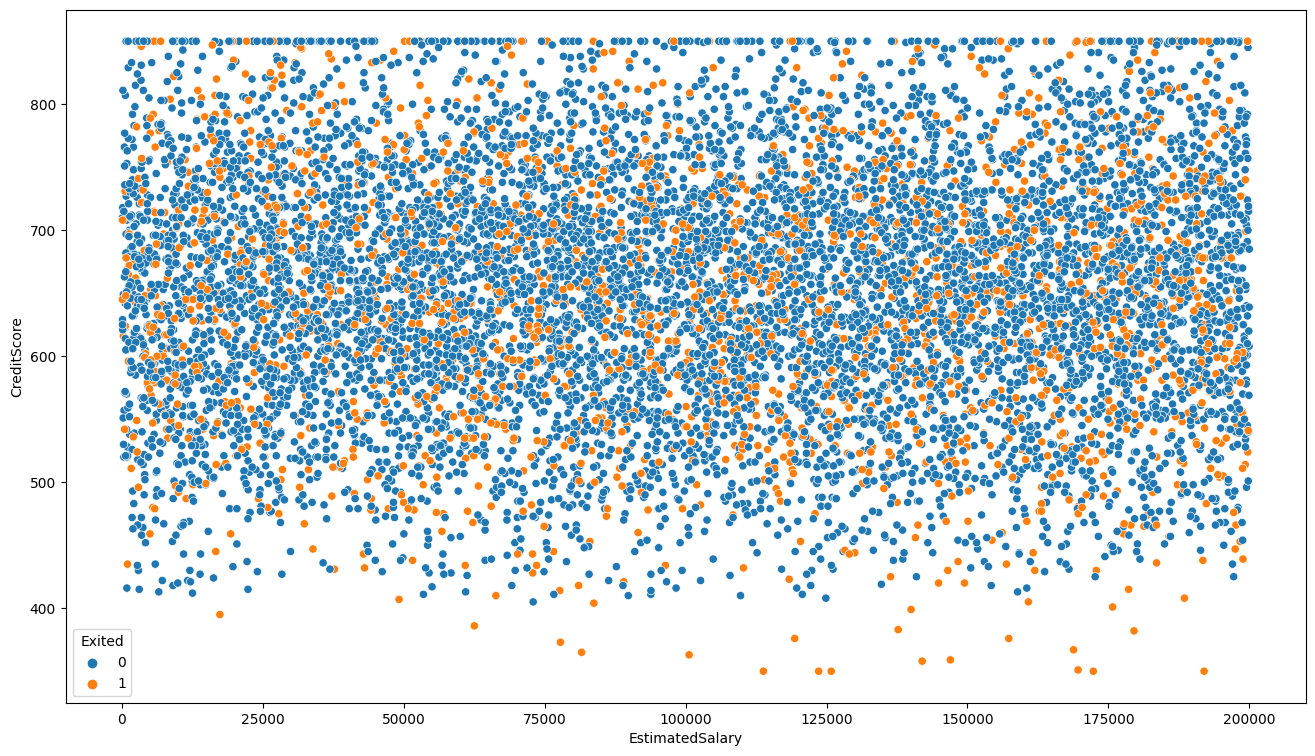

In [40]:
fig = plt.figure(figsize=(16, 9))

axes_scatter = sns.scatterplot(
    data=df,
    x='EstimatedSalary',
    y='CreditScore',
    hue='Exited'
);

Явной взаимосвязи кредитного рейтинга и предпогалаемой зарплаты в разрезе признака оттока клиентов не наблюдается.

## Задание 9.6

Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

### Вариант 1

Построение круговой диаграммы на основе таблицы, где после фильтрации остаются только ушедшие клиенты.

In [41]:
data_out = df[df['Exited'] == 1]['Gender'].value_counts()

# display(data_out)

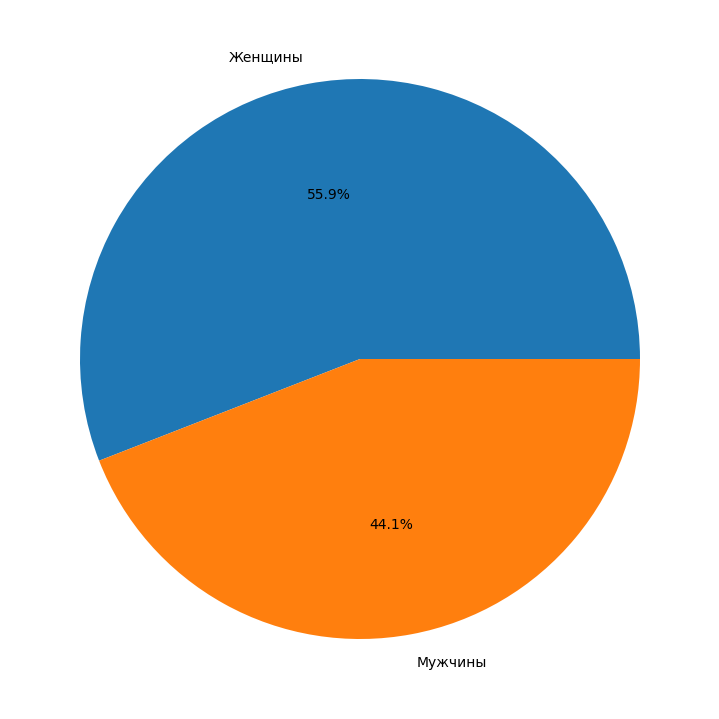

In [42]:
fig = plt.figure(figsize=(7, 7))

axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    data_out,
    labels=['Женщины', 'Мужчины'],
    autopct='%.1f%%'
);

Среди всех ушедших клиентов женщин больше чем мужчина на 10%.

### Вариант 2

Здесь рассматриваем отношение числа ушедших мужчин и женщин к общему числу клиентов.

In [43]:
df_gend = df[df['Exited'] == 1]

df_gend = df_gend['Gender'].value_counts()

# data = df.groupby(['Gender', 'Exited'])['Gender'].count()
data = df.groupby(['Exited', 'Gender'])['Gender'].count()

# display(data)

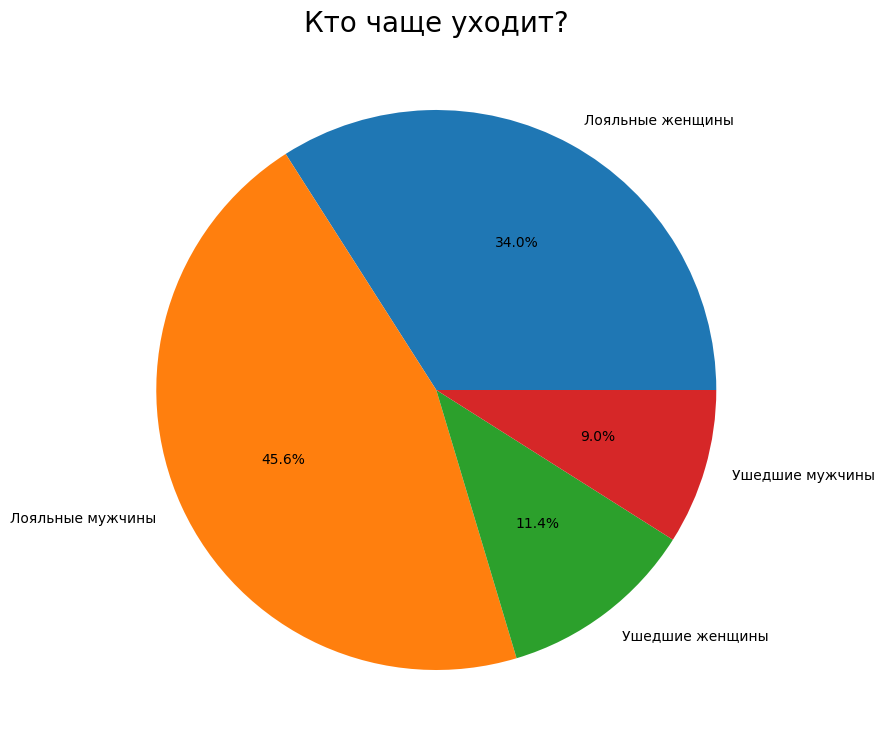

In [44]:
fig_gend = plt.figure(figsize=(7, 7))

axes_gend = fig_gend.add_axes([0, 0, 1, 1])
axes_gend.pie(
    data,
    # labels= data.index,
    labels = ['Лояльные женщины', 'Лояльные мужчины', 'Ушедшие женщины', 'Ушедшие мужчины'],
    autopct='%.1f%%'
);

axes_gend.set_title('Кто чаще уходит?', fontsize=20);

Круговая диаграмма показала, что среди ушедших клиентов женщин больше чем мужчин на 2%

## Задание 9.7

Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [45]:
data_prod = df.groupby(['NumOfProducts', 'Exited']).count()

pivot_df = df.pivot_table(
    values = 'CustomerId',
    index = ['NumOfProducts'],
    columns = ['Exited'],
    aggfunc='count',
    fill_value=0
)
display(pivot_df)

Exited,0,1
NumOfProducts,,
1,3675,1409
2,4242,348
3,46,220
4,0,60


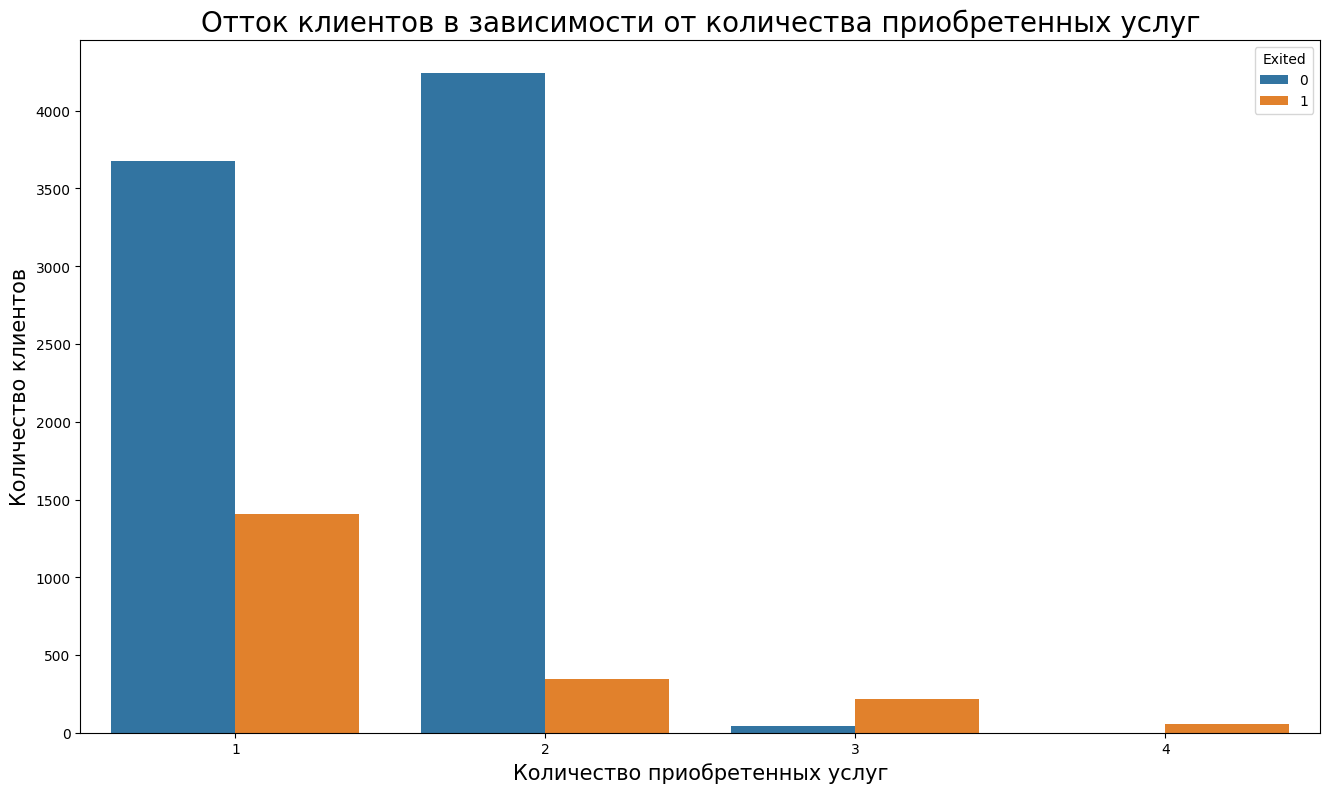

In [46]:
fig = plt.figure(figsize=(16, 9))

# axes_prod = sns.barplot(
#     data=df,
#     x='NumOfProducts',
#     y='CustomerId',
#     hue='Exited',
#     estimator='mean'
# );

# pivot_df.plot(
#     kind='bar',
#     figsize=(16, 9)
# );


axes_prod = sns.countplot(
    data=df,
    x='NumOfProducts',
    hue='Exited'
);


axes_prod.set_title('Отток клиентов в зависимости от количества приобретенных услуг', fontsize=20);
axes_prod.set_xlabel('Количество приобретенных услуг', fontsize=15);
axes_prod.set_ylabel('Количество клиентов', fontsize=15);

Больше всего отток клиентов наблюдается в группе, в которой клиенты имеют одну приобретенную банковскую услугу. 

## Задача 9.8

Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

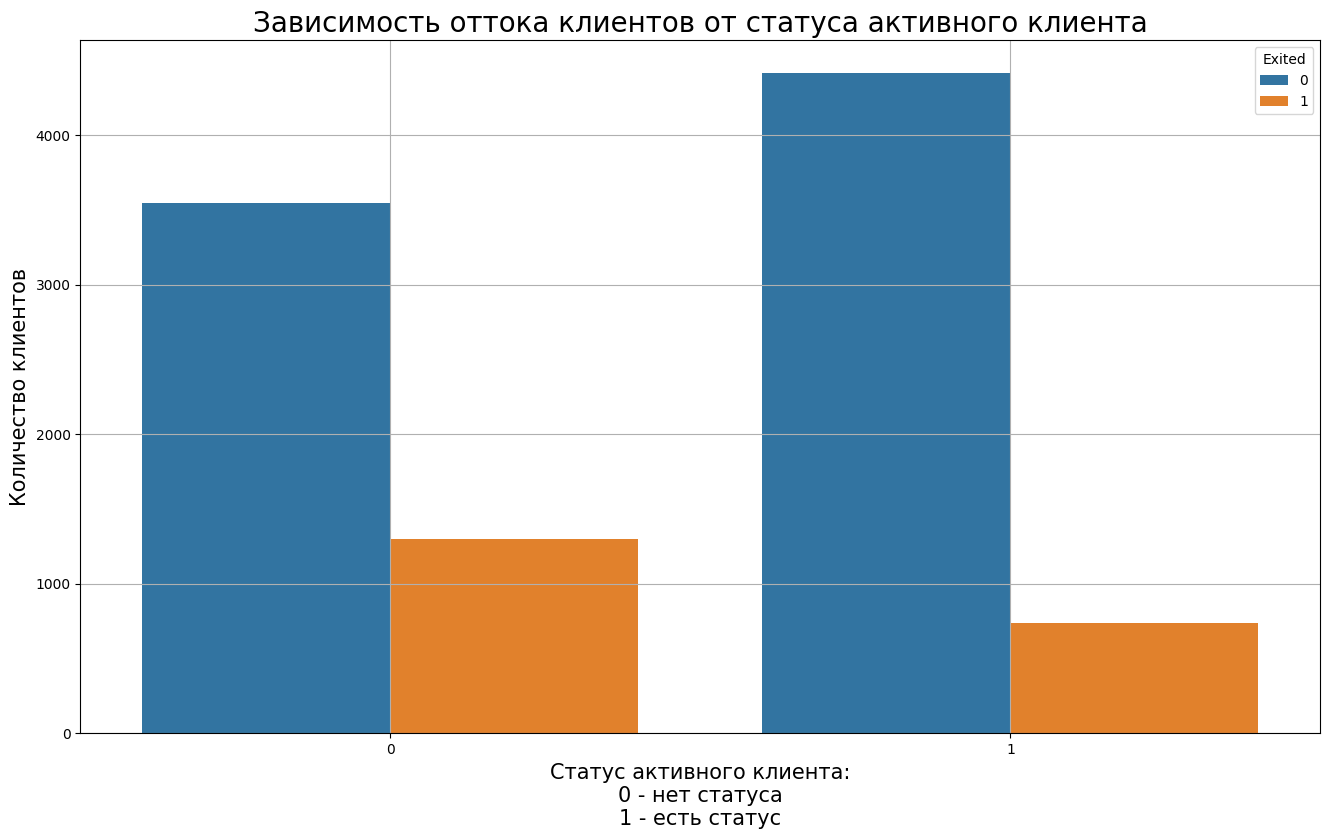

In [47]:
fig = plt.figure(figsize=(16, 9))

active = sns.countplot(
    data=df,
    x='IsActiveMember',
    hue='Exited'
);

active.set_title('Зависимость оттока клиентов от статуса активного клиента', fontsize=20);
active.set_xlabel('''Статус активного клиента:
0 - нет статуса
1 - есть статус''', fontsize=15);
active.set_ylabel('Количество клиентов', fontsize=15);
active.grid();

Многоуровневая диаграмма показывает, что клиенты, имеющие статус активного клиента, уходя реже (1250 - нет статуса, 800 - есть статус). Во всяком случае - различия небольшие. Можно сказать, что статус активного клиента не сильно влияет на отток.

Чтобы уменьшить отток среди неактивных клиентов, банк может попробовать стимулировать клиентов вести более активную финансовую деятельность: различные подписки, бонусы за оплату картой банка в магазине, партнерство с медиасервисами/маркетплейсами.

## Задание 9.9

В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [48]:
df2 = df.groupby('Geography')['Exited'].mean()

display(df.groupby('Geography')['Balance'].mean())
display(df2)

Geography
France      62092.636516
Germany    119730.116134
Spain       61818.147763
Name: Balance, dtype: float64

Geography
France     0.161548
Germany    0.324432
Spain      0.166734
Name: Exited, dtype: float64

In [49]:
fig = px.choropleth(
    data_frame = df2,
    locations=df2.index,
    locationmode = 'country names',
    color=df2,
    color_continuous_scale = 'Reds',
    width=800,
    height=600
)
fig.show()

Доля ушедших клиентов больше всего в Германии. Это может быть связано с тем, что немцы финансово грамотнее остальных европейцев, принимают активное участие в своей экономической жизни. То есть если где-то более выгодное для них предложение, то они незамедлительно действуют. Также у немцев счет в среднем в 2 раза больше, а как мы уже видели ранее в п.9.3, клиенты с большими счетами склонны уходить чаще. Возможно, что для крупных сумм условия хранения у данного банка не очень выгодные.

## Задание 9.10

Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

In [50]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [51]:
df1 = df.copy()

In [52]:
df1['CreditScoreCat'] = df1['CreditScore'].apply(get_credit_score_cat)

In [53]:
pivot2 = df1.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean',
    fill_value=0
)
pivot2.columns = pivot2.columns.astype('string')

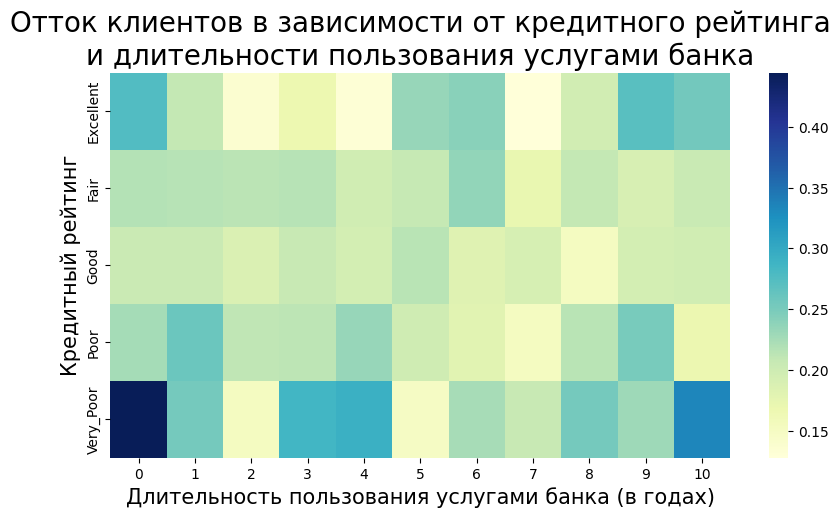

In [54]:
fig = plt.figure(figsize=(10, 5))

heatmap = sns.heatmap(
    data=pivot2,
    cmap='YlGnBu'
);

heatmap.set_title('''Отток клиентов в зависимости от кредитного рейтинга
и длительности пользования услугами банка''', fontsize=20);
heatmap.set_xlabel('Длительность пользования услугами банка (в годах)', fontsize=15);
heatmap.set_ylabel('Кредитный рейтинг', fontsize=15);

Больше всего отток наблюдается в группе клиентов с очень низким кредитным рейтингом и длительностью пользования услугами до 1 года. Доля ушедших в ней составляет около 40%. В целом, клиенты с низким кредитным рейтингом, не зависимо от длительности пользования услугами банка, уходят чаще остальным. Возможно это связано с тем, что банк не хочет рисковать и связываться с потенциальными ненадежными клиентами, поэтому не предлагает таким клиентам интересные и выгодные предложения, из-за чего клиенты уходят.

Одновременно с этим можем наблюдать уход клиентов с превосходным кредитным рейтингом. Больше всего наблюдается в группе, где длительность пользования услугами банка составляет до 1 года или 9-10 лет. Отток в первой группе возможен по причине потери инетереса клиента к услугам банка на фоне других более выгодных предложений. Это могут быть молодые люди, которым свойственна самоуверенность и переменчивость: недостаточно хорошо проанализировали предложения на рынке банковских услуг, "купились" на первое попавшееся и уже после наткнулись на более выгодное. Отток в группе с длительностью пользования услугами банка 9-10 лет может быть связан с тем, что у клиентов закрываются долгосрочные вклады, но пролонгация на предлагаемых условиях им не нравится, из-за чего эти клиенты уходят к банкам с более выгодными предложениями. 